In [1]:
import pandas as pd

df = pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv')

print("Columns present in dataset: ", df.columns,"\n")

print("Data types of columns",df.dtypes,"\n")

print("Number of rows and columns present",df.shape)

df.head()



Columns present in dataset:  Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object') 

Data types of columns Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object 

Number of rows and columns present (250000, 13)


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [2]:
# Average purchase amount
x=df['Total Purchase Amount'].mean()
print(x)

# Null values if any
df.isnull().sum()

2725.370732


,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47596
Customer Name,0


In [3]:
# Customers older than 60
z=df[df['Age']>60]
print("Number of customers whose age is more than 60: ",z.shape[0])

# number of customers who purchased electronics
c=df[df['Product Category']=='Electronics']['Customer ID'].nunique()
print("Number of customers who purchased electronic items: ",(c))

Number of customers whose age is more than 60:  47269
Number of customers who purchased electronic items:  31767


add plot


   Gender   Count  Percentage
0  Female  125560       50.22
1    Male  124440       49.78


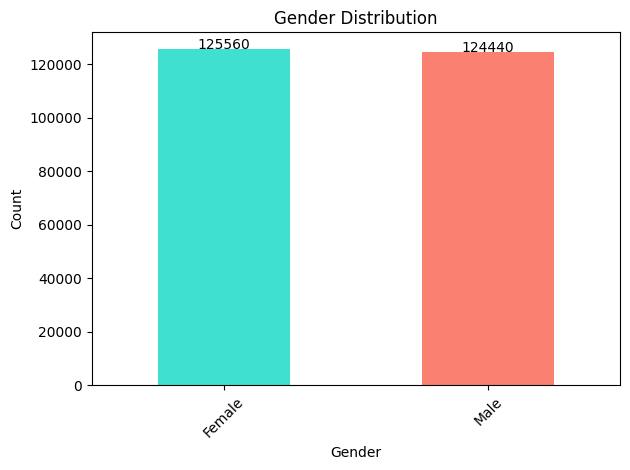

In [44]:
import matplotlib.pyplot as plt
# Gender Distribution of customers
a = df['Gender'].value_counts()
b = df['Gender'].value_counts(normalize=True) * 100
gender_distribution = pd.DataFrame({
    'Count':a,
    'Percentage':b.round(2)
})
print(gender_distribution.reset_index())

# plot
ax=gender_distribution['Count'].plot(kind='bar', color=['turquoise', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, val in enumerate(gender_distribution['Count']):
    ax.text(i, val + 1, str(val), ha='center')

plt.tight_layout()
plt.show()


In [50]:
# Customers likely to churn based on age and gender
bins = [-float('inf'), 18, 50, float('inf')]
labels = ['<18', '18-50', '>50']

# Create a new column 'AgeGroup' by binning 'Age'
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

churn_distributions=df.groupby(['AgeGroup','Gender'],observed=False)['Churn'].value_counts().unstack().reset_index()


churn_distributions = churn_distributions.rename(columns={0:"Not Churned", 1:"Churned"})
print(churn_distributions)




Churn AgeGroup  Gender  Not Churned  Churned
0          <18  Female         1935      563
1          <18    Male         1937      568
2        18-50  Female        60853    14999
3        18-50    Male        59849    15215
4          >50  Female        38132     9078
5          >50    Male        37420     9451


In [6]:
# filling null values
df['Returns']=df['Returns'].fillna(df['Returns'].mode()[0])

y=df[df['Returns']==1]['Customer ID'].nunique()
print("Number of customers who returned product atleast once: ",(y))


Number of customers who returned product atleast once:  43224


In [7]:
# Age distribution of customers who returned products
bins=[-float('inf'),18,35,60,float('inf')]
labels=['<18','18-35','35-60','>60']

df['Age_group2']=pd.cut(df['Age'],bins=bins,labels=labels)

returned_df=df[df['Returns']==1]
return_distribution = returned_df['Age_group2'].value_counts().sort_index()
# to convert it to dataframe
return_distribution = return_distribution.to_frame(name='Returned_Count')
# to align the column names
return_distribution=return_distribution.reset_index()
print(return_distribution)


  Age_group2  Returned_Count
0        <18            2015
1      18-35           32394
2      35-60           47279
3        >60           19081


Most bought product category:  Clothing


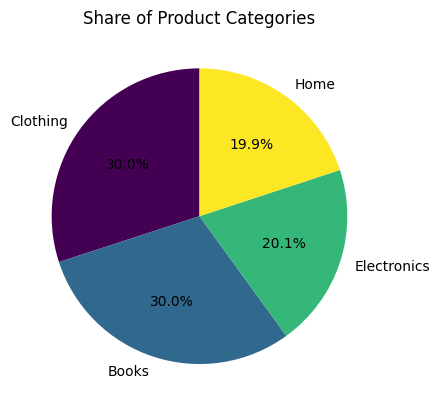

In [58]:
# Most bought product cateogory
x=df['Product Category'].value_counts()
print("Most bought product category: ",x.idxmax())

x.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title("Share of Product Categories")
plt.ylabel('')
plt.show()


In [9]:
# average purchase amount per customer
avg_purchase = df.groupby(['Customer ID'])['Total Purchase Amount'].mean()
avg_purchase = avg_purchase.to_frame('Average purchase amount').reset_index()

print(avg_purchase)

       Customer ID  Average purchase amount
0                1              3491.000000
1                2              2662.666667
2                3              2823.375000
3                4              2178.750000
4                5              1565.500000
...            ...                      ...
49668        49996              3511.000000
49669        49997              2803.875000
49670        49998              2152.500000
49671        49999              3492.000000
49672        50000              2058.000000

[49673 rows x 2 columns]


In [10]:
# customer with highest total purchase
highest_purchaser = df.groupby(['Customer ID'])['Total Purchase Amount'].sum()

top_customer_id=highest_purchaser.idxmax()
top_purchase_amt = highest_purchaser.max()
print(f"Customer id: {top_customer_id} with total purchase {top_purchase_amt}")


Customer id: 36437 with total purchase 55339


  Quantity_distribution  Number of products
0                     1               50108
1                     2               50021
2                     3               49872
3                     4               50037
4                     5               49962


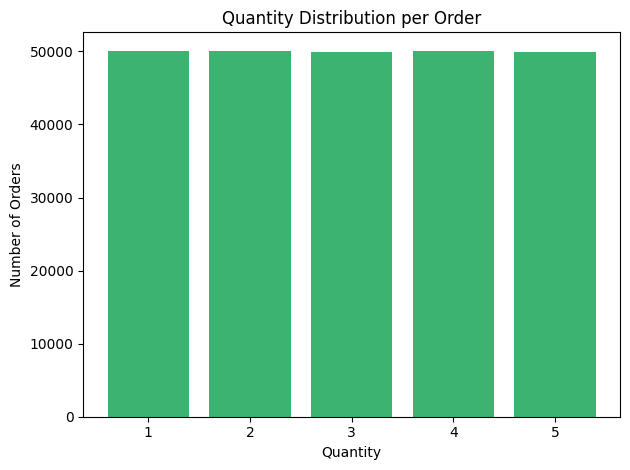

In [61]:
# Distribution of quantities bought per order
bins = [0,1,2,3,4,5]
labels = ['1','2','3','4','5']
df['Quantity_distribution']=pd.cut(df['Quantity'],bins=bins,labels=labels)
dist_quantity = df['Quantity_distribution'].value_counts().sort_index()
dist_quantity = dist_quantity.to_frame('Number of products').reset_index()
print(dist_quantity)

# plot
plt.bar(dist_quantity['Quantity_distribution'], dist_quantity['Number of products'], color='mediumseagreen')
plt.title("Quantity Distribution per Order")
plt.xlabel("Quantity")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


In [12]:
# Total revenue generated
returns = df[df['Returns']==0]
revenue = returns['Total Purchase Amount'].sum()
print(f"Total revenue generated after excluding returned items ${revenue}")


# product category with highest revenue
cat = returns.groupby(['Product Category'])['Total Purchase Amount'].sum().idxmax()
print(f"Most revenue generated from {cat} category")


Total revenue generated after excluding returned items $406676297
Most revenue generated from Clothing category


In [13]:
# average revenue per order
avg_revenue = df['Total Purchase Amount'].mean()
print("Average revenue per order is:",avg_revenue)

# payment method used in high value transactions
high_transaction = df[df['Total Purchase Amount']>1000]
pay_method = high_transaction['Payment Method'].value_counts().idxmax()
print("Most used payment method for high-value transactions(above $1000): ",pay_method)

Average revenue per order is: 2725.370732
Msot used payment method for high-value transactions(above $1000):  Credit Card


In [14]:
# checking for duplicate values

duplicate_ids=df[df['Customer ID'].duplicated()]
print("Duplicate ids: ",len(duplicate_ids))

duplicate_names=df[df['Customer Name'].duplicated()]
print("Duplicate names: ", len(duplicate_names))



Duplicate ids:  200327
Duplicate names:  210080


In [15]:
# change column names
df.rename(columns={'Product Price':'Price',
                   'Total Purchase Amount':'Total_Amount'},inplace=True)
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Price', 'Quantity',
       'Total_Amount', 'Payment Method', 'Customer Age', 'Returns',
       'Customer Name', 'Age', 'Gender', 'Churn', 'AgeGroup', 'Age_group2',
       'Quantity_distribution'],
      dtype='object')

In [16]:
# percentage of total orders returned
total_items = len(df)

returned_count = df[df['Returns']==1].shape[0]

percentage = (returned_count/total_items) * 100
print(f"Percentage of total orders returned: {percentage:.2f}%")

Percentage of total orders returned: 40.31%


In [17]:
# relationship between churn and customer
return_by_customer = df.groupby(['Customer ID'])['Returns'].sum()

churn_status = df[['Customer ID','Churn']].drop_duplicates()

customer_data = pd.merge(return_by_customer,churn_status,on='Customer ID')
print(customer_data.groupby('Churn')['Returns'].mean())

Churn
0    2.028592
1    2.028867
Name: Returns, dtype: float64


In [18]:
# return rate per product category
product_count = df['Product Category'].value_counts()

returns = df[df['Returns']==1]
return_count = returns['Product Category'].value_counts()

return_rate = (return_count/product_count) * 100
print(return_rate.to_frame('Return rate').reset_index())

  Product Category  Return rate
0            Books    40.352680
1         Clothing    40.134840
2      Electronics    40.392548
3             Home    40.414435


In [60]:
# segmenting based on age, total amount spent, returns

df['AgeGroups1'] = pd.cut(df['Age'], bins=[-float('inf'),18,40,70,float('inf')],labels=['>18','18-40','40-70','<70'])

df['Spent'] = pd.cut(df['Total_Amount'],bins=[-float('inf'),200,500,800,float('inf')],labels=['>200','200-500','500-800','<800'])

df['return_segment'] = df['Returns'].apply(lambda x: "Returned" if x==1 else "Not Returned")

df.head(10)


,Customer ID,Purchase Date,Product Category,Price,Quantity,Total_Amount,Payment Method,Customer Age,Returns,Customer Name,...,Churn,AgeGroup,Age_group2,Quantity_distribution,AgeGroups1,Spent,return_segment,Age_group_3,Payment_Method_Coded,Age_group3
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,...,0,18-50,35-60,3,18-40,500-800,Not Returned,Old,1,Old
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,...,0,18-50,35-60,4,18-40,<800,Not Returned,Old,3,Old
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,...,0,18-50,35-60,2,18-40,<800,Not Returned,Old,3,Old
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,...,0,18-50,35-60,1,18-40,<800,Not Returned,Old,3,Old
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,...,1,18-50,35-60,1,40-70,<800,Not Returned,Old,1,Old
5,13593,2023-03-07 14:17:42,Home,250,4,575,PayPal,49,1.0,James Grant,...,1,18-50,35-60,4,40-70,500-800,Returned,Old,3,Old
6,13593,2023-04-15 03:02:33,Electronics,73,1,1896,Credit Card,49,0.0,James Grant,...,1,18-50,35-60,1,40-70,<800,Not Returned,Old,1,Old
7,13593,2021-03-27 21:23:28,Books,337,2,2937,Cash,49,0.0,James Grant,...,1,18-50,35-60,2,40-70,<800,Not Returned,Old,0,Old
8,13593,2020-05-05 20:14:00,Clothing,182,2,3363,PayPal,49,1.0,James Grant,...,1,18-50,35-60,2,40-70,<800,Returned,Old,3,Old
9,28805,2023-09-13 04:24:00,Electronics,394,2,1993,Credit Card,19,0.0,Jose Collier,...,0,18-50,18-35,2,18-40,<800,Not Returned,Young,1,Young


In [52]:
# Total amount spent by churned customers vs retained
Stats = df.groupby('Churn')['Total_Amount'].mean()
print(Stats.to_frame('Amount').reset_index())

# young or old customers likely to churn
df['Age_group3'] = pd.cut(df['Age'],bins=[-float('inf'),35,float('inf')],labels=['Young','Old'])

churn_st = df.groupby('Age_group3',observed=False)['Churn'].mean() * 100
churn_st=churn_st.round(2)
print(churn_st.to_frame('Churn Percentage').reset_index())

   Churn       Amount
0      0  2724.815996
1      1  2727.596684
  Age_group3  Churn Percentage
0      Young             20.18
1        Old             19.83


In [21]:
# most prefered payment
most_prefered = df['Payment Method'].value_counts()
print("Most prefered payment method is: ",most_prefered.idxmax())



Most prefered payment method is:  Credit Card


In [54]:
# corelation between payment method and return rates
df['Payment_Method_Coded'] = df['Payment Method'].astype('category').cat.codes

cor = df['Payment_Method_Coded'].corr(df['Returns'])
cor=cor.round(4)
print(cor)
if cor<1:
  print("There is no relation between payment method and returns")


-0.0021
There is no relation between payment method and returns


In [25]:
# payment method used by churned customers
churned_cust = df[df['Churn']==1]
x = churned_cust['Payment Method'].value_counts()
print(f"Payment method most used by churned customers is {x.idxmax()}")

Payment method most used by churned customers is Credit Card


# New Section